In [ ]:
import pickle

In [2]:
with open("..//Data//gcn_cdr_train.pickle", "rb") as f: 
    catch = pickle.load(f)

In [3]:
cdr_train_drugs, gcn_train_drugs, cdr_train_omics, gcn_train_omics, train_targets = catch

In [4]:
with open("..//Data//gcn_cdr_test.pickle", "rb") as f: 
    catch_test = pickle.load(f)

In [5]:
cdr_test_drugs, gcn_test_drugs, cdr_test_omics, gcn_test_omics, test_targets = catch_test

In [6]:
from sklearn.decomposition import PCA

In [7]:
keep_dims = 64

In [8]:
pca_cdr_drugs = PCA(n_components=cdr_train_drugs.shape[1])

In [9]:
pca_cdr_drugs.fit(cdr_train_drugs)

PCA(n_components=128)

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

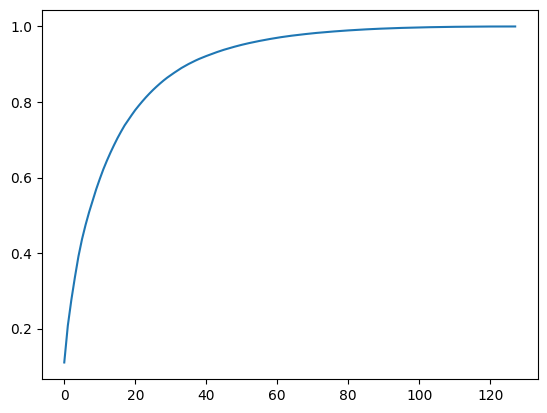

In [12]:
plt.plot(np.cumsum(pca_cdr_drugs.explained_variance_ratio_))

In [13]:
cdr_train_drugs = pca_cdr_drugs.transform(cdr_train_drugs)[:, :keep_dims]

In [14]:
cdr_test_drugs = pca_cdr_drugs.transform(cdr_test_drugs)[:, :keep_dims]

In [15]:
pca_cdr_omics = PCA(n_components=cdr_train_omics.shape[1])

In [16]:
pca_cdr_omics.fit(cdr_train_omics)

PCA(n_components=256)

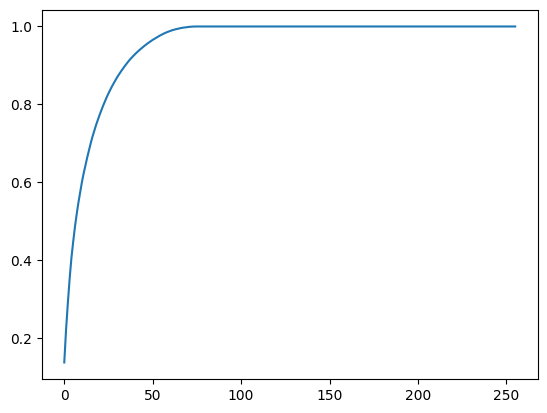

In [17]:
plt.plot(np.cumsum(pca_cdr_omics.explained_variance_ratio_))

In [18]:
cdr_train_omics = pca_cdr_omics.transform(cdr_train_omics)[:, :keep_dims]

In [19]:
cdr_test_omics = pca_cdr_omics.transform(cdr_test_omics)[:, :keep_dims]

In [20]:
pca_gcn_drugs = PCA(n_components=gcn_train_drugs.shape[1])

In [21]:
pca_gcn_drugs.fit(gcn_train_drugs)

PCA(n_components=128)

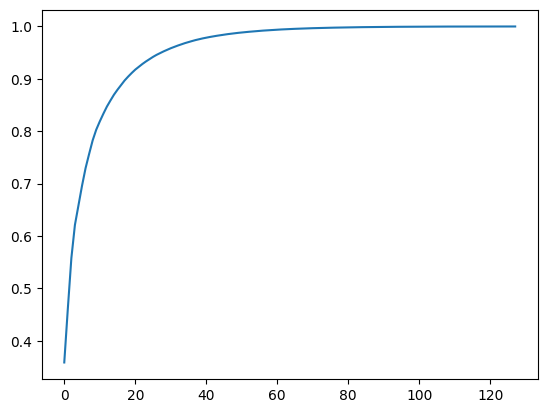

In [22]:
plt.plot(np.cumsum(pca_gcn_drugs.explained_variance_ratio_))

In [23]:
gcn_train_drugs = pca_gcn_drugs.transform(gcn_train_drugs)[:, :keep_dims]

In [24]:
gcn_test_drugs = pca_gcn_drugs.transform(gcn_test_drugs)[:, :keep_dims]

In [25]:
pca_gcn_omics = PCA(n_components=gcn_train_omics.shape[1])

In [26]:
pca_gcn_omics.fit(gcn_train_omics)

PCA(n_components=256)

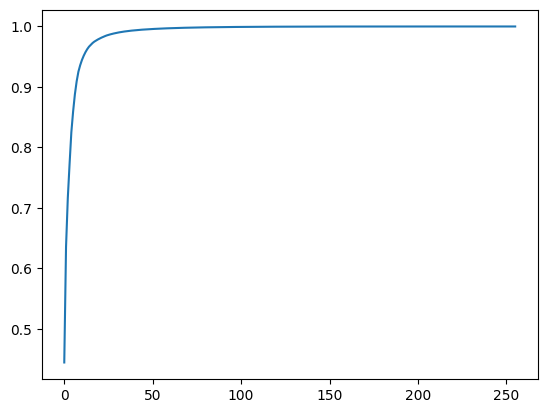

In [27]:
plt.plot(np.cumsum(pca_gcn_omics.explained_variance_ratio_))

In [28]:
gcn_train_omics = pca_gcn_omics.transform(gcn_train_omics)[:, :keep_dims]

In [29]:
gcn_test_omics = pca_gcn_omics.transform(gcn_test_omics)[:, :keep_dims]

In [30]:
final_train = [cdr_train_drugs, cdr_train_omics, gcn_train_drugs, gcn_train_omics, train_targets.astype("float64")]

In [31]:
with open("..//Data//gcn_cdr_train_pca_higher.pickle", "wb") as f: 
    pickle.dump(final_train, f)

In [32]:
final_test = [cdr_test_drugs, cdr_test_omics, gcn_test_drugs, gcn_test_omics, test_targets.astype("float64")]

In [33]:
with open("..//Data//gcn_cdr_test_pca_higher.pickle", "wb") as f: 
    pickle.dump(final_test, f)